This is mostly just experimentation - probably should remove from final repo.

In [41]:
import sys

# others will need to change the below line to point at broadbandequity directory
# this is necessary so that the jupyternotebook can load our package
sys.path[0] = '/Users/drewkeller/Desktop/CS/broadbandequity'

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_pipeline.fetch_census_data import acs5_aggregate 
from data_pipeline import spatial_operations as so
from data_pipeline import interactive_mapping as im
import numpy as np
import pandas as pd
from IPython.display import display
import geopandas as gpd
import os

In [43]:
tract_data = acs5_aggregate()[["estimated total population","tract"]]
tract_data['population'] = tract_data['estimated total population']
tract_data = tract_data.drop(columns='estimated total population')
tract_data.head()

,tract,population
0,630200,1825
1,580700,5908
2,590600,3419
3,600700,2835
4,611900,1639


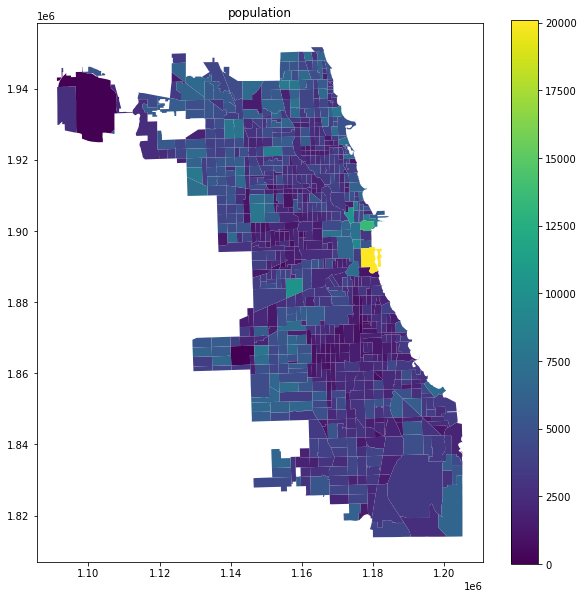

In [44]:
plt.rcParams['figure.figsize'] = [10, 10]  # add more space
so.simple_map(tract_data,'population','tract')

In [45]:
np.nansum(so.geographize(tract_data,'tract').population)

2758503.0

Nice. That's a correct map of Chicago tracts (note the clear lakeshore boundary) and correct 2019 population.

In [46]:
# now we want to rewrite the shapefile to have the right columns and projection.
geo = gpd.read_file('/Users/drewkeller/Desktop/ChTr0812/ChTr0812.shp')
geo

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,OBJECTID,tl2010Proj,tl2010Pr_1,tl2010Pr_2,tl2010Pr_3,tl2010Pr_4,tl2010Pr_5,tl2010Pr_6,tl2010Pr_7,tl2010Pr_8,...,PtLTHS,PtHSGED,PtSomeCo,PtBAPlus,TotDet,Pov,PtPov,Tract_1,PctFB,geometry
0,1,17,043,840000,17043840000,8400,Census Tract 8400,G5020,11754772.0,124997.0,...,16.8,29.2,21.9,32.0,2713.0,332.0,0.122374,840000,30.9,"MULTIPOLYGON (((1096672.940 1927611.312, 10966..."
1,2,17,043,840801,17043840801,8408.01,Census Tract 8408.01,G5020,2508457.0,9907.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,None,0.0,"MULTIPOLYGON (((1096672.956 1927611.220, 10966..."
2,3,17,031,840300,17031840300,8403,Census Tract 8403,G5020,831224.0,0.0,...,42.4,38.0,9.9,9.7,4034.0,1224.0,0.303421,840300,46.2,"POLYGON ((1163591.927 1881471.238, 1163525.437..."
3,4,17,031,840200,17031840200,8402,Census Tract 8402,G5020,831087.0,0.0,...,23.7,31.9,21.2,23.2,2513.0,503.0,0.200159,840200,48.7,"POLYGON ((1172724.229 1887341.263, 1172726.397..."
4,5,17,031,841100,17031841100,8411,Census Tract 8411,G5020,1143247.0,0.0,...,35.7,29.4,10.9,24.0,7011.0,2663.0,0.379832,841100,65.1,"POLYGON ((1176041.550 1889791.988, 1176043.375..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,805,17,031,630300,17031630300,6303,Census Tract 6303,G5020,985491.0,0.0,...,50.7,30.0,13.7,5.6,5814.0,1285.0,0.221018,630300,45.5,"POLYGON ((1155907.427 1870638.274, 1155911.403..."
805,806,17,031,630400,17031630400,6304,Census Tract 6304,G5020,658247.0,0.0,...,57.1,23.3,12.8,6.9,6908.0,2326.0,0.336711,630400,42.6,"POLYGON ((1158644.638 1868060.212, 1158578.114..."
806,807,17,031,630500,17031630500,6305,Census Tract 6305,G5020,657743.0,0.0,...,54.6,29.3,11.0,5.1,5964.0,1078.0,0.180751,630500,48.0,"POLYGON ((1161234.867 1870796.334, 1161237.841..."
807,808,17,031,630800,17031630800,6308,Census Tract 6308,G5020,655815.0,0.0,...,51.2,27.3,14.4,7.1,6820.0,1702.0,0.249560,630800,54.2,"POLYGON ((1158719.744 1865406.385, 1158653.489..."


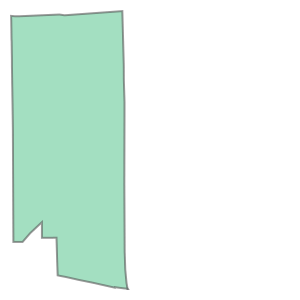

In [47]:
geo.geometry[0]

In [48]:
geo.crs

{'init': 'epsg:3435'}

So there is a projection! That's good news. The question then is why it's not showing up on the map right. I think maybe the crs attribute should be a different object, not just some dictionary?

In [49]:
geo = geo.set_crs("epsg:3435")

AttributeError: 'GeoDataFrame' object has no attribute 'set_crs'

In [ ]:
test = gpd.GeoDataFrame(geo)
test.crs = {'init':'EPSG:3435'}

In [ ]:
test = test.to_crs(epsg=3435)

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

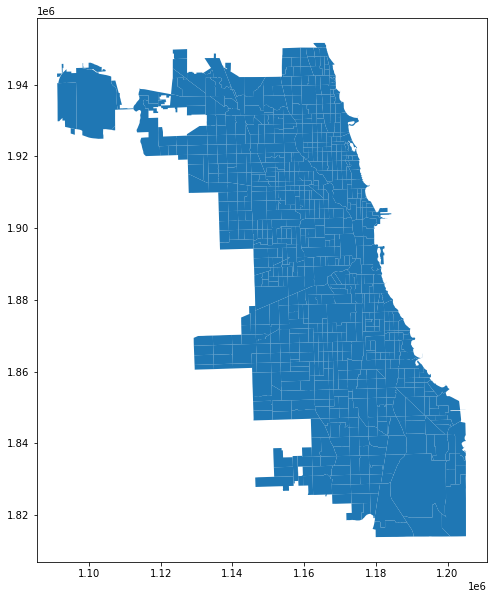

In [ ]:
test.plot()

In [ ]:
geo.columns

Index(['OBJECTID', 'tl2010Proj', 'tl2010Pr_1', 'tl2010Pr_2', 'tl2010Pr_3',
       'tl2010Pr_4', 'tl2010Pr_5', 'tl2010Pr_6', 'tl2010Pr_7', 'tl2010Pr_8',
       'tl2010Pr_9', 'tl2010P_10', 'test__2___', 'test__2__1', 'Shape_Leng',
       'Shape_Area', 'PctDOUnemp', 'PctDOUne_1', 'SqMiles', 'Population',
       'COUNTY', 'GEOID2', 'TRACT', 'CHGOCA', 'CAName', 'NAME', 'Total',
       'A0004', 'A0509', 'A1014', 'A1517', 'A1819', 'A20', 'A21', 'A2224',
       'A2529', 'A3034', 'A3539', 'A4044', 'A4549', 'A5054', 'A5559', 'A6061',
       'A6264', 'A6566', 'A6769', 'A7074', 'A7579', 'A8084', 'A8599', 'Pct017',
       'Pct1824', 'Pct2534', 'Pct3544', 'Pct4554', 'Pct5564', 'Pct6500',
       'Total1', 'NL', 'NLWh', 'NLBl', 'NLAIAN', 'NLA', 'NLNHOPI', 'NLOther',
       'Latino', 'PtNLA', 'PtNLB', 'PtNLWh', 'PtNLOth', 'PtL', 'FB', 'Total25',
       'LTHS', 'HSGED', 'SomeColl', 'BAPlus', 'PtLTHS', 'PtHSGED', 'PtSomeCo',
       'PtBAPlus', 'TotDet', 'Pov', 'PtPov', 'Tract_1', 'PctFB', 'geometry'],
  

In [ ]:
# remove unneeded columns
geo = geo[[
    'Shape_Leng','Shape_Area','SqMiles','GEOID2','TRACT','CHGOCA','geometry'
    ]]

In [ ]:
# rename columns
geo = geo.rename(columns={
    "TRACT" : "tract",
    "CHGOCA" : "community_area"
})
geo

In [ ]:
# write to shapefile
geo.to_file("/Users/drewkeller/Desktop/ChTr0812/ChTr0812.shp")

In [ ]:
# reload to check
geo = gpd.read_file('/Users/drewkeller/Desktop/ChTr0812/ChTr0812.shp')
geo

Nice.

But there's a problem still - we have duplicate tracts??

In [ ]:
geo = gpd.read_file('/Users/drewkeller/Desktop/CS/broadbandequity/geo/tracts.shp')
geo

In [ ]:
len(geo.tract)

In [ ]:
len(set(geo.tract))

There's one duplicate. K.

In [ ]:
geo.drop_duplicates()

... but not an identical duplicate. Weird.

In [ ]:
wheres_that_pesky_duplicate = geo.groupby(by='tract').count().reset_index()
wheres_that_pesky_duplicate

In [ ]:
wheres_that_pesky_duplicate.geometry.argmax()

In [ ]:
wheres_that_pesky_duplicate.iloc[769]

In [ ]:
geo_sorted = geo.sort_values(by='tract').reset_index()
geo_sorted

In [ ]:
geo_sorted[769:771]

Hm. Based on Shape_Area and Shape_Leng, those are not really interchangeable. We don't like that. We're gonna have to map them and see which one is legit.

In [ ]:
duplicates = geo_sorted[geo_sorted.tract=='840000']
duplicates

In [ ]:
big_dup = duplicates[round(duplicates.Shape_Leng)==37281]
small_dup = duplicates[round(duplicates.Shape_Leng)==15230]

In [ ]:
so.simple_map(big_dup,'Shape_Area','tract')

In [ ]:
so.simple_map(small_dup,'Shape_Area','tract')

Where are these guys?

In [ ]:
geo.plot()

In [ ]:
# compare w comm areas
areas = gpd.read_file('/Users/drewkeller/Desktop/CS/broadbandequity/geo/community_areas.shp')
areas.plot()


In [ ]:
im.InteractiveMap(big_dup,'tract').map


NameError: name 'big_dup' is not defined

In [ ]:
im.InteractiveMap(small_dup,'tract').map